# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?&units=metric&appid=' + weather_api_key
# units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except :
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | maturin
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | honolulu
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | ponazyrevo
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | fairmont
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | hinatuan
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | umm lajj
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of S

Processing Record 32 of Set 4 | along
Processing Record 33 of Set 4 | bentiu
Processing Record 34 of Set 4 | boueni
Processing Record 35 of Set 4 | jiangyou
Processing Record 36 of Set 4 | geraldton
Processing Record 37 of Set 4 | codrington
Processing Record 38 of Set 4 | piacabucu
Processing Record 39 of Set 4 | pershotravneve
Processing Record 40 of Set 4 | genhe
Processing Record 41 of Set 4 | verkhnevilyuysk
Processing Record 42 of Set 4 | batemans bay
Processing Record 43 of Set 4 | bossier city
Processing Record 44 of Set 4 | sorbhog
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | maymyo
Processing Record 49 of Set 4 | freistadt
Processing Record 0 of Set 5 | mar del plata
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | ucluelet
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | lewiston
Proc

Processing Record 17 of Set 8 | muisne
Processing Record 18 of Set 8 | ngunguru
Processing Record 19 of Set 8 | tuatapere
Processing Record 20 of Set 8 | richards bay
Processing Record 21 of Set 8 | roald
Processing Record 22 of Set 8 | chapleau
Processing Record 23 of Set 8 | chegdomyn
Processing Record 24 of Set 8 | manosque
Processing Record 25 of Set 8 | itaporanga
Processing Record 26 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 8 | panjab
Processing Record 28 of Set 8 | tiksi
Processing Record 29 of Set 8 | tucupita
Processing Record 30 of Set 8 | ilulissat
Processing Record 31 of Set 8 | gidole
Processing Record 32 of Set 8 | ardesen
Processing Record 33 of Set 8 | ouadda
Processing Record 34 of Set 8 | kathu
Processing Record 35 of Set 8 | knysna
Processing Record 36 of Set 8 | solnechnyy
Processing Record 37 of Set 8 | lucapa
Processing Record 38 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 39 of Set 8 | sungai siput utar

Processing Record 1 of Set 12 | bose
Processing Record 2 of Set 12 | college
Processing Record 3 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 12 | siverskiy
Processing Record 5 of Set 12 | boddam
Processing Record 6 of Set 12 | xadani
City not found. Skipping...
Processing Record 7 of Set 12 | saint-georges
Processing Record 8 of Set 12 | rong kwang
Processing Record 9 of Set 12 | veraval
Processing Record 10 of Set 12 | palana
Processing Record 11 of Set 12 | redlands
Processing Record 12 of Set 12 | santa flavia
Processing Record 13 of Set 12 | leningradskiy
Processing Record 14 of Set 12 | skibbereen
Processing Record 15 of Set 12 | salinas
Processing Record 16 of Set 12 | harlingen
Processing Record 17 of Set 12 | tutubigan
Processing Record 18 of Set 12 | tarko-sale
Processing Record 19 of Set 12 | balkhash
Processing Record 20 of Set 12 | rawson
Processing Record 21 of Set 12 | loa janan
Processing Record 22 of Set 12 | port hedland
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,3.73,93,100,5.14,US,1670276706
1,ancud,-41.8697,-73.8203,13.65,97,95,5.53,CL,1670276929
2,maturin,9.7500,-63.1767,24.18,84,79,2.52,VE,1670276939
3,saint george,37.1041,-113.5841,14.97,54,20,2.24,US,1670276915
4,chuy,-33.6971,-53.4616,20.94,79,0,3.71,UY,1670276940


In [6]:
# Convert date to normal date format
city_data_df['Date'] = (pd.to_datetime(city_data_df['Date'], unit = 's')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,3.73,93,100,5.14,US,2022-12-05
1,ancud,-41.8697,-73.8203,13.65,97,95,5.53,CL,2022-12-05
2,maturin,9.7500,-63.1767,24.18,84,79,2.52,VE,2022-12-05
3,saint george,37.1041,-113.5841,14.97,54,20,2.24,US,2022-12-05
4,chuy,-33.6971,-53.4616,20.94,79,0,3.71,UY,2022-12-05


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,3.73,93,100,5.14,US,2022-12-05
1,ancud,-41.8697,-73.8203,13.65,97,95,5.53,CL,2022-12-05
2,maturin,9.7500,-63.1767,24.18,84,79,2.52,VE,2022-12-05
3,saint george,37.1041,-113.5841,14.97,54,20,2.24,US,2022-12-05
4,chuy,-33.6971,-53.4616,20.94,79,0,3.71,UY,2022-12-05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

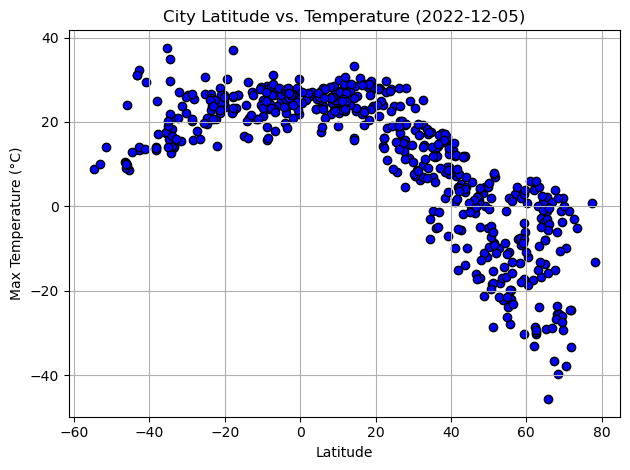

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', facecolors = 'b', edgecolors = 'k')

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

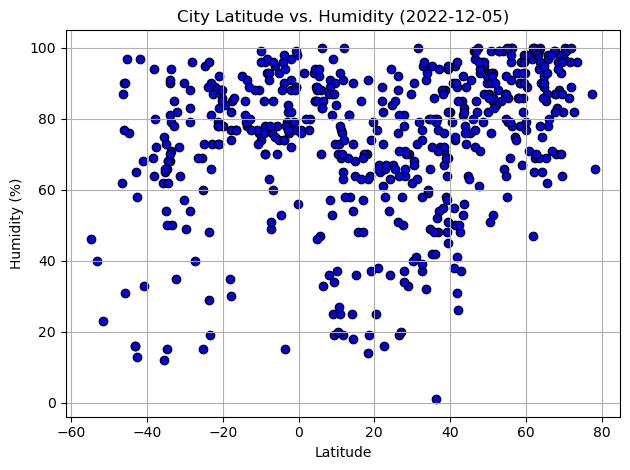

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', facecolors = "b", edgecolors = 'k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

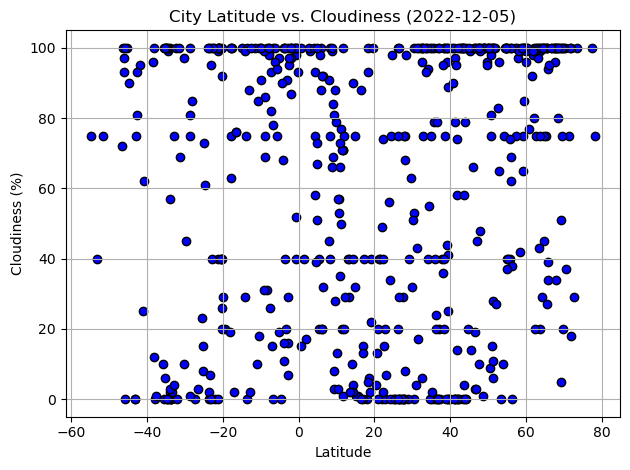

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', facecolors = "b", edgecolors = 'k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

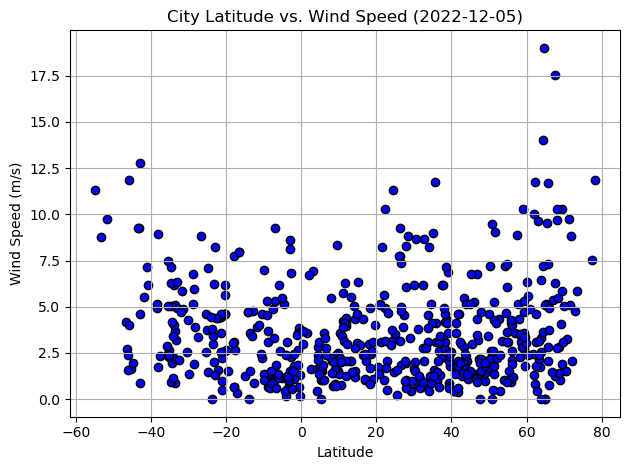

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', facecolors = "b", edgecolors = 'k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def linearplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    return line_eq
    
    
# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b) , fontsize = 15, color = "red")

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,3.73,93,100,5.14,US,2022-12-05
2,maturin,9.7500,-63.1767,24.18,84,79,2.52,VE,2022-12-05
3,saint george,37.1041,-113.5841,14.97,54,20,2.24,US,2022-12-05
5,honolulu,21.3069,-157.8583,27.90,67,40,3.09,US,2022-12-05
7,albany,42.6001,-73.9662,5.25,48,100,3.01,US,2022-12-05


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,13.65,97,95,5.53,CL,2022-12-05
4,chuy,-33.6971,-53.4616,20.94,79,0,3.71,UY,2022-12-05
6,bluff,-46.6000,168.3333,10.45,62,72,4.18,NZ,2022-12-05
10,rikitea,-23.1203,-134.9692,24.23,81,95,6.23,PF,2022-12-05
12,ushuaia,-54.8000,-68.3000,8.81,46,75,11.32,AR,2022-12-05


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8452691254941108


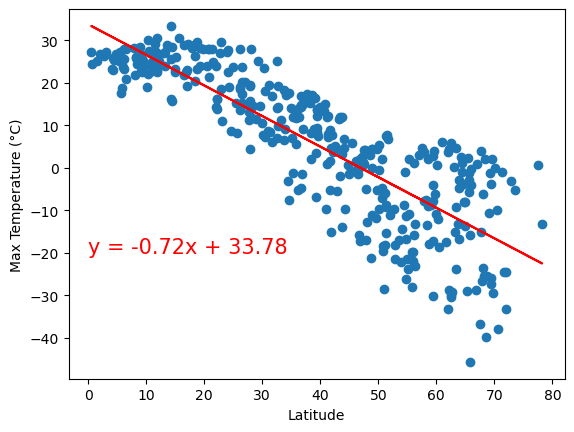

In [60]:
# Linear regression on Northern Hemisphere
equation = linearplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
annotate(equation, 0, -20)
plt.ylabel("Max Temperature (°C)")
plt.show()

The r-value is: 0.5250822904968245


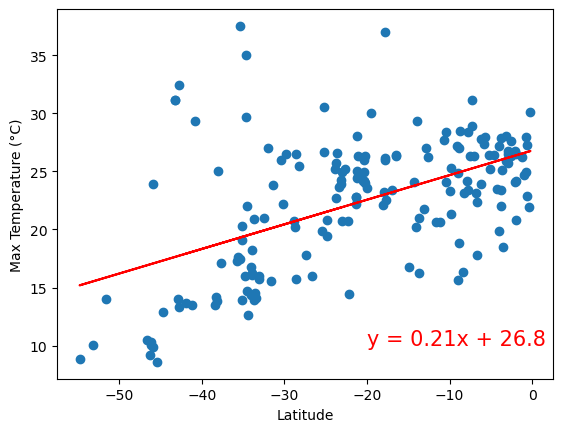

In [63]:
# Linear regression on Southern Hemisphere
equation = linearplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
annotate(equation, -20, 10)
plt.ylabel("Max Temperature (°C)")
plt.show()

**Discussion about the linear relationship:** The max temperature in the northern hemisphere is shown to have a strong negative linear relationship with the latitude representing the decrease of temperature as latitude increases. The southern hemisphere exhibits the opposite where temperature increases as latitude increases with a more moderate relationship which can be evident from the r-value. The cities closest to the equator tend to have the average max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3713271547411287


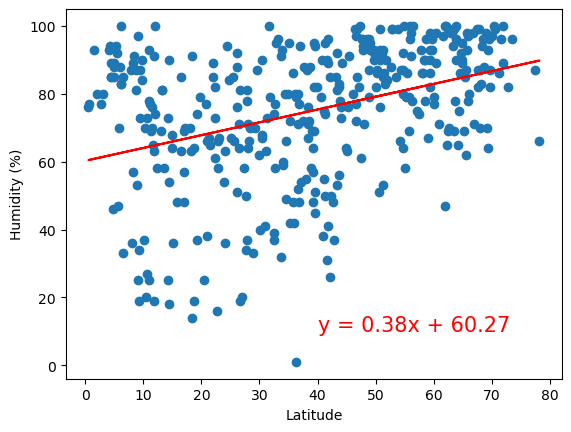

In [66]:
# Northern Hemisphere
equation = linearplot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
annotate(equation, 40, 10)
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.36867300124997493


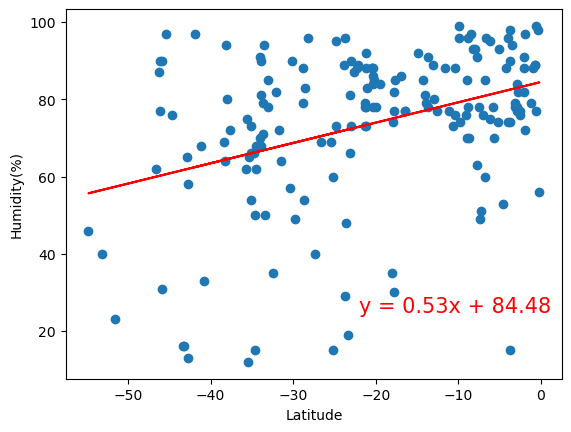

In [71]:
# Southern Hemisphere
equation = linearplot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
annotate(equation, -22, 25)
plt.ylabel("Humidity(%)")
plt.show()

**Discussion about the linear relationship:** When it comes to humidity, there seems to be an increase in humidity as latitude increases regardless of hemisphere. Both have similar r-values and only slightly differ where the northern hemisphere has a steeper slope.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3079002269007028


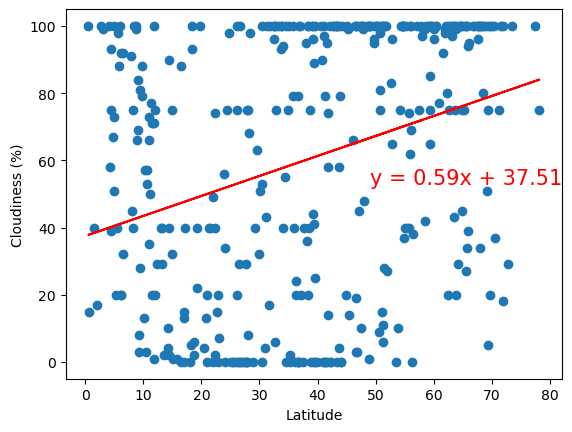

In [77]:
# Northern Hemisphere
equation = linearplot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
annotate(equation, 49, 53)
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.18306764341537227


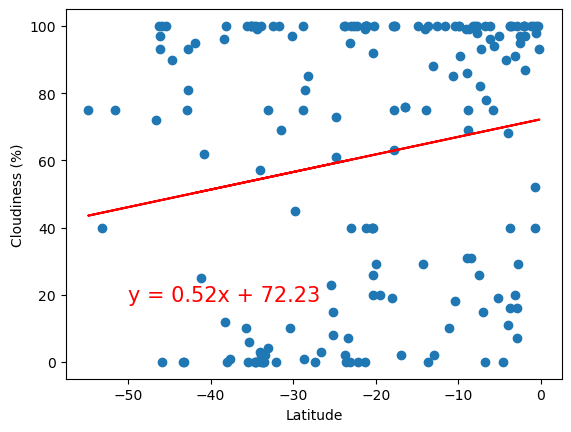

In [83]:
# Southern Hemisphere
equation = linearplot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
annotate(equation, -50, 18)
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** The effect of cloudiness in both hemispheres are relatively weak compared to latitude, increasing as latitude increases regardless of hemisphere. Both hemispheres exhibit similar linear regression slopes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20987160691614345


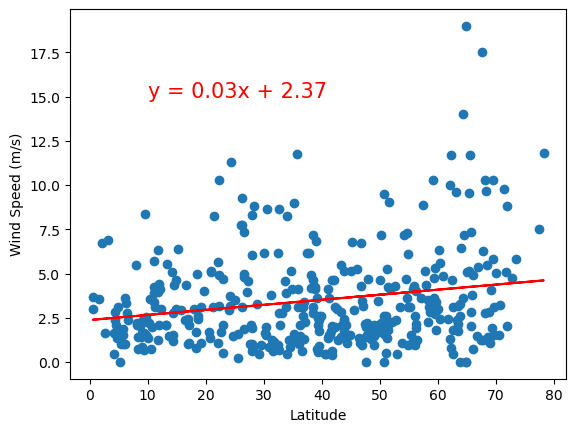

In [86]:
# Northern Hemisphere
equation = linearplot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
annotate(equation, 10, 15)
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.3868375733128659


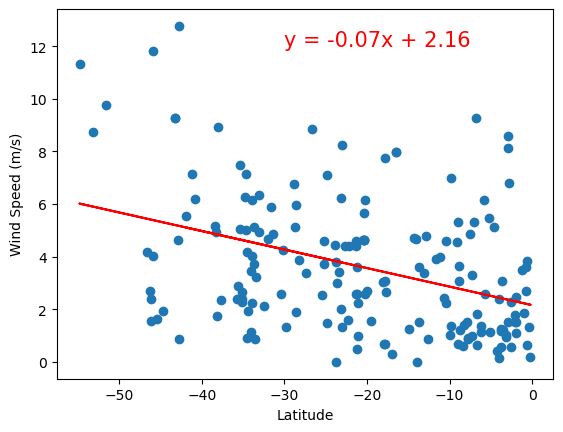

In [90]:
# Southern Hemisphere
equation = linearplot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
annotate(equation, -30, 12)
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** The wind speeds of each hemisphere differ on average where the wind speed increases as latitude increases in the northern hemsiphere and the opposite occurs in the southern hemisphere. 